<a href="https://colab.research.google.com/github/piyushpp07/DataScience/blob/main/Mini_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.Get Data

> Indented block


2.Visualise

> Indented block


3.Feature Engineering

> Indented block


4.Select and train Model

> Indented block


5.Fine Tuning

> Indented block




In [64]:
import pandas as pd

In [65]:
df=housing=pd.read_csv("https://raw.githubusercontent.com/mohitgupta-omg/Kaggle-California-Housing-Prices/master/Data/housing.csv")

In [66]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [67]:
housing.sample(7)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
16288,-121.31,37.93,21.0,1556.0,314.0,1140.0,304.0,2.4667,81400.0,INLAND
441,-122.30,37.87,52.0,3123.0,749.0,1695.0,684.0,2.2208,144800.0,NEAR BAY
11482,-117.99,33.73,24.0,2104.0,421.0,1181.0,414.0,3.8365,250900.0,<1H OCEAN
20229,-119.30,34.27,17.0,1527.0,503.0,688.0,423.0,1.6007,187500.0,NEAR OCEAN
11399,-117.96,33.72,23.0,3929.0,559.0,1858.0,538.0,6.8645,318200.0,<1H OCEAN
18152,-122.05,37.37,35.0,1365.0,256.0,662.0,262.0,5.6533,291400.0,<1H OCEAN
16103,-122.50,37.76,45.0,1673.0,377.0,1078.0,393.0,3.3393,272300.0,NEAR OCEAN


In [68]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [69]:
housing.shape

(20640, 10)

In [70]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


VisualIze

In [71]:
housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [72]:
import matplotlib.pyplot as plt
import seaborn.apionly as sns

(array([ 877., 3612., 4099., 3771., 2799., 1769., 1239.,  752.,  479.,
        1243.]),
 array([ 14999. ,  63499.2, 111999.4, 160499.6, 208999.8, 257500. ,
        306000.2, 354500.4, 403000.6, 451500.8, 500001. ]),
 <a list of 10 Patch objects>)

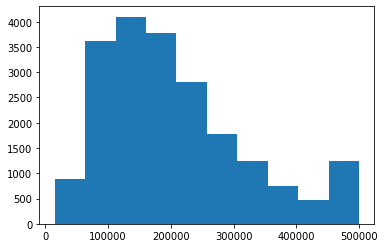

In [73]:

plt.hist(housing['median_house_value'])


In [74]:
plt.show()

In [75]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

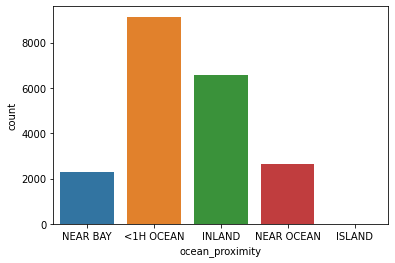

In [76]:
sns.countplot(data=housing,x='ocean_proximity')

In [77]:
import plotly.express as px

In [78]:
px.box(df,x='ocean_proximity',y='median_house_value')

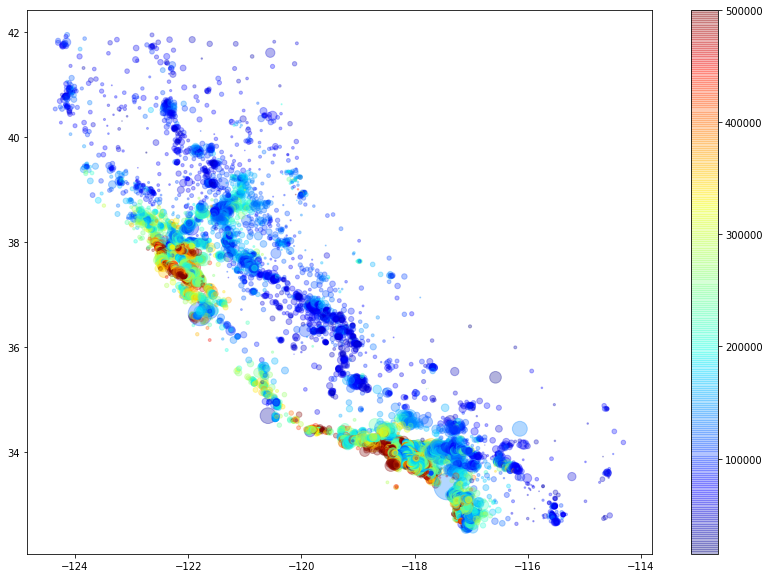

In [79]:
plt.figure(figsize=(14,10))
plt.scatter(housing['longitude'],housing['latitude'],alpha=0.3,s=housing['population']/50,c=housing['median_house_value'],cmap='jet')
plt.colorbar()
plt.show()

In [81]:
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


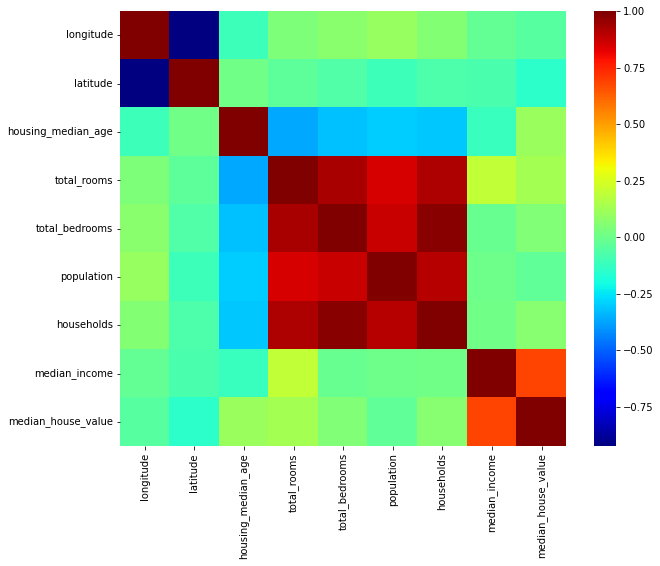

In [82]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),cmap='jet')

In [83]:
df.corr()['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

**Plot all numerical feature against each other**

Feature Engineering

Experimenting with columns

In [84]:
housing['roomsperhouse']=housing['total_rooms']/housing['households']

In [85]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,roomsperhouse
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853


In [86]:
housing['populationperhouse']=housing['population']/housing['households']

In [87]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,roomsperhouse,populationperhouse
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,2.181467
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,5.045455,2.560606
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,6.114035,3.122807
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,5.205543,2.325635
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,5.329513,2.123209


In [88]:
housing['bedroomperroom']=housing['total_bedrooms']/housing['total_rooms']

In [89]:
housing.corr()['median_income'].sort_values()

bedroomperroom       -0.615661
housing_median_age   -0.119034
latitude             -0.079809
longitude            -0.015176
total_bedrooms       -0.007723
population            0.004834
households            0.013033
populationperhouse    0.018766
total_rooms           0.198050
roomsperhouse         0.326895
median_house_value    0.688075
median_income         1.000000
Name: median_income, dtype: float64

#Preparing dataset for ml algorithm

#DATA CLEANING
Drop row
Drop Column 
FIl 

In [90]:
housing['total_bedrooms'].median()

435.0

In [93]:
housing['total_rooms'].min()

2.0

In [100]:
housing['total_bedrooms']=housing['total_bedrooms'].fillna(435.0)

In [101]:
housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms          0
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
roomsperhouse           0
populationperhouse      0
bedroomperroom        207
dtype: int64

In [102]:
housing['bedroomperroom']=housing['total_bedrooms']/housing['total_rooms']

In [103]:
housing.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
roomsperhouse         0
populationperhouse    0
bedroomperroom        0
dtype: int64

## Text and categiorical values
#string -> no 
# categorical data ->number
Ordinal encoder
ways 
one hot encoder 
fill dummy

In [107]:
from sklearn import preprocessing

In [120]:
od = preprocessing.OrdinalEncoder(categories=['INLAND','1HOCEAN','NEAR_OCEAN','NEAR_BAY','ISLAND'])

In [119]:
od

OrdinalEncoder(categories=['INLAND', '1HOCEAN', 'NEAR_OCEAN', 'NEAR_BAY',
                           'ISLAND'])

In [146]:
od.fit(housing[['ocean_proximity']])

ValueError: ignored

In [117]:
od.transform(housing[['ocean_proximity']])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning:

X has feature names, but OrdinalEncoder was fitted without feature names



AttributeError: ignored

##One hot encoder

In [122]:
pd

<module 'pandas' from '/usr/local/lib/python3.7/dist-packages/pandas/__init__.py'>

In [126]:
pd.get_dummies(housing['ocean_proximity'])

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [135]:
oh=preprocessing.OneHotEncoder()

In [137]:
oh.fit_transform(housing[['ocean_proximity']]).toarray


<bound method _cs_matrix.toarray of <20640x5 sparse matrix of type '<class 'numpy.float64'>'
	with 20640 stored elements in Compressed Sparse Row format>>

In [142]:
ss=preprocessing.StandardScaler()


In [145]:
ss.fit(housing.drop('ocean_proximity',axis=1))
ss.transform(housing.drop('ocean_proximity',axis=1))

array([[-1.32783522,  1.05254828,  0.98214266, ...,  0.62855945,
        -0.04959654, -1.02998783],
       [-1.32284391,  1.04318455, -0.60701891, ...,  0.32704136,
        -0.09251223, -0.8888972 ],
       [-1.33282653,  1.03850269,  1.85618152, ...,  1.15562047,
        -0.02584253, -1.29168566],
       ...,
       [-0.8237132 ,  1.77823747, -0.92485123, ..., -0.09031802,
        -0.0717345 ,  0.02113407],
       [-0.87362627,  1.77823747, -0.84539315, ..., -0.04021111,
        -0.09122515,  0.09346655],
       [-0.83369581,  1.75014627, -1.00430931, ..., -0.07044252,
        -0.04368215,  0.11327519]])